# [개념 필사]

# CHAPTER 05 <회귀>

## 01. 개요

> 회귀분석

* 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
* {독립 변수(피처) 여러 개 - 종속변수(결정값) 1개} 상관관계 모델링
* 머신러닝 회귀 예측의 목표 - 최적의 회귀 계수 찾기
* 단일회귀, 다중회귀, 선형회귀, 비선형회귀
* 예측값이 **연속형 숫자값** (분류와 차이점)

> 선형회귀모델

* 일반 선형 회귀: 잔차제곱합 최소화, 규제 없음
* 릿지: 선형회귀 + L2 규제 (상대적으로 큰 회귀 계수값의 예측 영향도를 감소시키기 위해 값을 더 작게 만듦)
* 라쏘: 선형회귀 + L1 규제 (예측 영향력이 작은 회귀 계수를 0으로 만듦 == 피처 선택 기능)
* 엘라스틱넷: L2 + L1 / 피처가 많은 데이터세트에 적용
* 로지스틱 회귀: 분류에 사용되는 모델 / 이진 분류, 텍스트 분류

## 02. 단순 선형 회귀

독립변수 1개, 종속변수 1개

선형 관계

회귀 계수: 기울기 & 절편

잔차제곱합(RSS)을 최소화

* RSS - 비용
* 회귀 계수로 표현되는 RSS 식 - 비용 함수(손실 함수) << 최소반환값을 구해야함

## 03. 비용 최소화 - 경사 하강법

> 경사 하강법

* 점진적으로 반복적인 계산, W 파라미터 값을 업데이트 하며 오류값을 최소화하는 파라미터 구하는 방식
* 오류값을 감소해나가는 방법 - 미분된 함수의 최소기울기 구하기
* 수행 시간 매우 오래 걸림 => 확률적 경사 하강법 사용

> 확률적 경사 하강법

* 전체 데이터 아닌 일부 데이터에 한해 w 업데이트값 계산 (빠른 속도)
* 대용량 데이터라면, 확률적 경사 하강법 or 미니 배치 확률적 경사 하강법 사용!

> 회귀 계수 여러개인 경우(선형) => 유사하게 예측값 도출

## 04. 보스턴 주택 가격 예측 ; LinearRegression

> LinearRegression 클래스

* OLS (Ordinary Least Squares) 추정 방식 구현
* fit() 수행 후, 회귀 계수 W를 coef_ 속성에 저장
* 입력 파라미터
```
fit_intercept: 불린값, True, 절편값을 계산할건지
normalize: 불린값, False, 회귀 수행 전 데이터셋 정규화
```
* 속성
```
coef_: fit() 수행 시 회귀 계수가 배열형태로 저장되는 속성. Shape=(Target값개수, 피처개수)
intercept_: 절편값
```
* OLS 단점 - 피처간 상관관계 높은 경우 분산 매우 커져서 오류에 민감 ; **다중공선성 문제** (독립적인 피처만 남기거나, PCA 차원숙소 등...)

> 회귀 평가 지표

* MAE: Mean Absolute Erros. 잔차를 절댓값으로 변환해 평균.
* MSE: 잔차를 제곱해 평균.
* RMSE: MSE에 루트. *mean_squared_erro(, squared=False)*
* R2: 예측값의 MSE / 실제값의 MSE
* MSLE: MSE에 로그 적용.
* RMSLE: RMSE에 로그 적용.

* 사이킷런 API, 평가 시(cross_val_score, GridSearchCV) 사용되는 scoring 파라미터 적용값
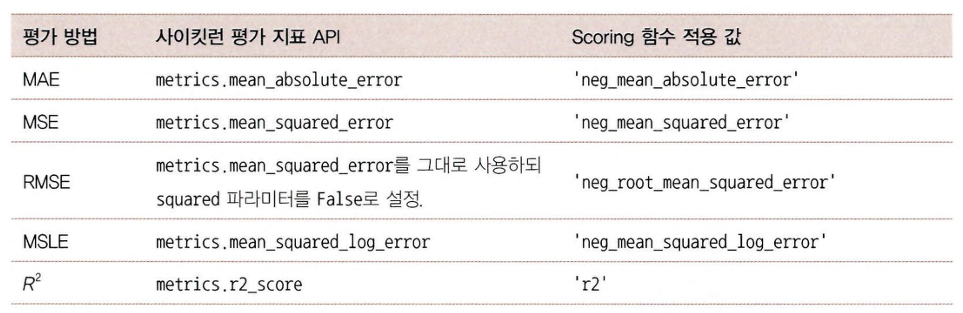
**neg_ 의미: -1을 곱했다는 뜻 / 회귀에서는 score값이 작을수록 좋기 때문임.  

> 보스턴 주택 가격 회귀 구현

```
sns.regplot(): X,Y 산점도와 함께 선형회귀 직선 그려줌
```

* metrics 모듈 - mean_squared_error(), r2_score() 이용해 MSE, R2 스코어 측정
* cross_val_score() - 교차 검증을 통해 MSE, RMSE 측정 / 이때 score 값 음수로 반환되는 것 주의!!

## 05. 다항 회귀와 과(대)적합, 과소적합

> 다항 회귀

* 독립변수의 단항식이 아닌 다항식으로 표현되는 회귀.
* 선형회귀임. (독립변수의 선형 여부가 아닌 **회귀 계수의 선형여부**가 기준)
* 구현 방법 - '비선형 함수를 선형 모델에 적용시키는 방법' 사용

 (1) 피처를 다항식 피처로 변환 (PolynomialFeatures 클래스) => 변환된 피처에 선형 회귀 적용

 (2)사이킷런 Pipeline 객체 이용, 위 과정 한번에 구현 가능


> 과소적합 및 과적합 이해

* 다항회귀의 차수(degree)를 높일수록 과적합 문제 발생
* 너무 복잡한 다항식을 만족하는 회귀 계수 << 현실과 동떨어진 예측 결과 반환

> 편향 - 분산 트레이드오프

* 매우 단순화된 모델 "고편향성" (한 방향으로 치우침) => 과소적합 쉬움
* 매우 복잡한 모델 "고분산성" => 과적합 쉬움
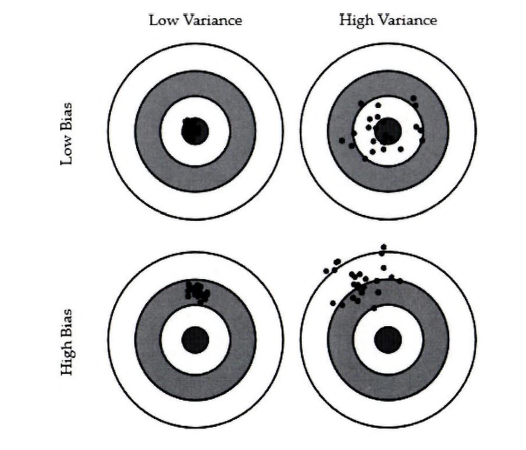
* 일반적으로 편향&분산은 트레이드오프 관계에 있음
* 전체 오류값이 최대로 낮아지는 모델 구축 중요




# [코드 필사]

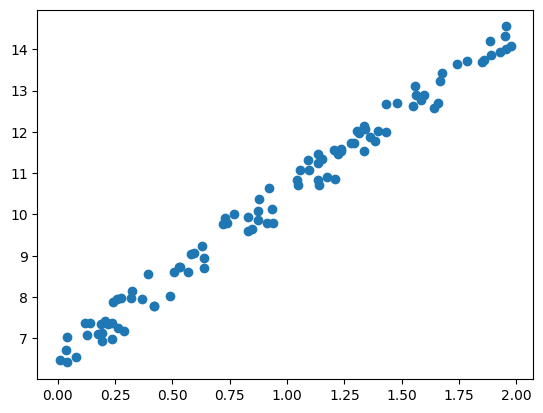

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y=4x+6 근사시키기. 임의의값은 노이즈를 위해 생성
X=2*np.random.rand(100,1)
y=6 + 4*X+np.random.rand(100,1)

# X,y 시각화
plt.scatter(X,y)

In [4]:
# 비용 함수 정의

def get_cost(y,y_pred):
    N=len(y)
    cost=np.sum(np.square(y=y_pred))/N
    return cost

* 경사 하강법 구현 ; gradient_descent_steps()
>> w1,w0을 모두 0으로 초기화 - iters  개수만큼 반복하며 파라미터 업데이트

* 넘파이 행렬에 W 업데이트 ; get_weight_updates()

In [10]:
# w1, w0 업데이트할 w1_update, w0_update 반환
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  # w1_update, w0_update를 각각 w1, w0 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  # 예측 배열 계산, 실제값과의 차이 계산
  y_pred = np.dot(X,w1.T)+w0
  diff = y - y_pred

  # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  # w1, w0 업데이트할 w1_update, w0_update 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

  return w1_update, w0_update

In [11]:
# iters 횟수만큼 반복적으로 w1, w0 업데이트 적용
def gradient_descent_steps(X,y, iters=10000):
  # 0 초기화
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1,w0,X,y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [15]:
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X,y,iters=1000)
print('w1:{0:.3f} w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0[0,0]
print('Gradient Descent Total Csot:{0:.4f}'.format(get_cost(y,y_pred)))

w1:4.028 w0:6.490
Gradient Descent Total Csot:0.0775


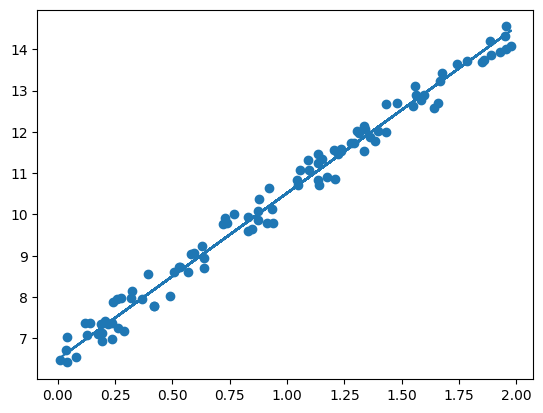

In [16]:
plt.scatter(X,y)
plt.plot(X,y_pred)

* (미니 배치) 확률적 경사 하강법 ; stochastic_gradient_descent_steps()

차이점) 전체 데이터에서 랜덤하게 데이터 추출

In [17]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0=np.zeros((1,1))
  w1=np.zeros((1,1))

  for ind in range(iters):
    np.random.seed(ind)
    # 전체 데이터에서 랜덤하게 batch_size 만큼 추출해 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update, w0_update = get_weight_updates(w1,w0,sample_X,sample_y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  return w1, w0

In [18]:
w1, w0 = stochastic_gradient_descent_steps(X,y,iters=1000)
print('w1:', round(w1[0,0],3), 'w0:', round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Csot:{0:.4f}'.format(get_cost(y,y_pred)))

w1: 4.031 w0: 6.486
Stochastic Gradient Descent Total Csot:0.0777


## 선형회귀를 이용해 보스턴 주택 가격 회귀 구현

In [23]:
from ast import increment_lineno
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(url)

bostonDF = boston.copy()
bostonDF = bostonDF.rename(columns={'medv': 'PRICE'})

# target 배열이 주택 가격. PRICE 칼럼으로 DF에 추가
print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


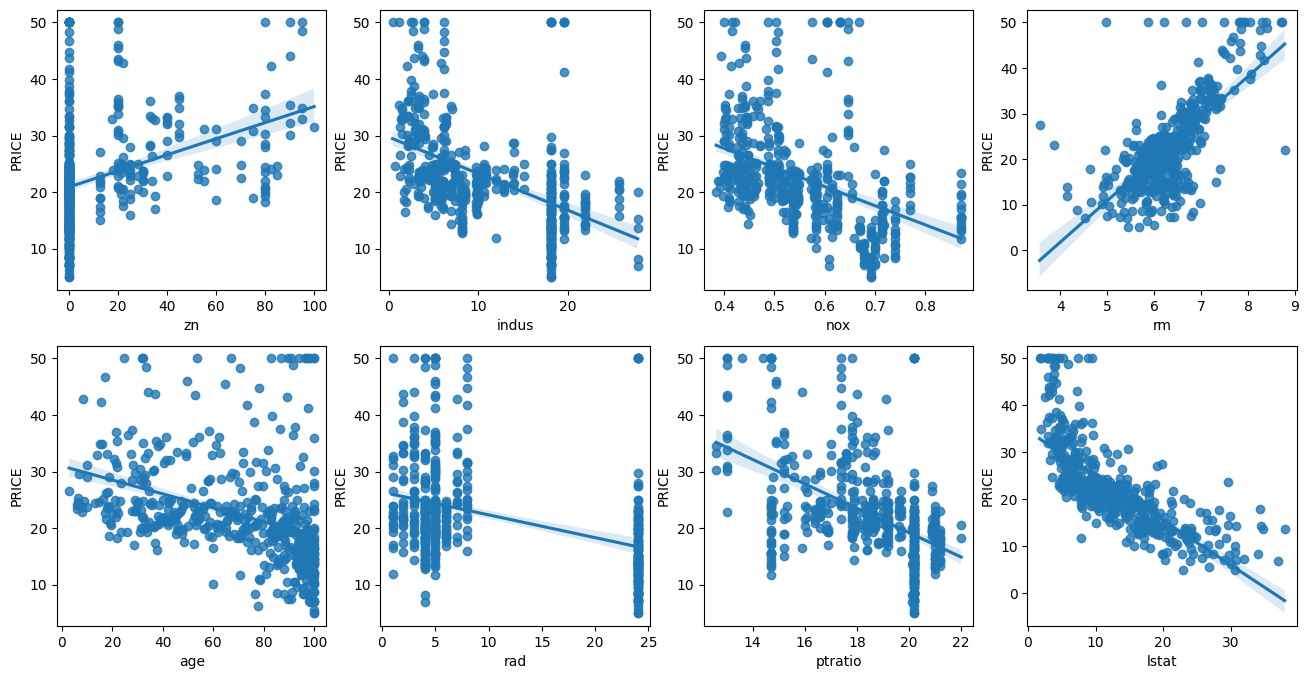

In [25]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ['zn', 'indus', 'nox', 'rm', 'age', 'rad', 'ptratio', 'lstat']
for i, feature in enumerate(lm_features):
    row = int(i / 4)
    col = i % 4
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

* rm(방개수): 양 방향 선형성 강함
* lstat(하위계층비율): 음 방향 선형성 강함

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# OLS
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3f}'.format(mse, rmse))
print('Variance Score:{0:.3f}'.format(r2_score(y_test, y_preds)))

MSE:17.297, RMSE:4.159
Variance Score:0.757


In [28]:
print('절편 값:', lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_,1))

절편 값: 40.995595172164826
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [29]:
# 회귀 계수 내림차순 정렬 위해 Series로 생성. 인덱스 칼럼명 유의
coeff = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
coeff.sort_values(ascending=False)

,0
rm,3.4
chas,3.0
rad,0.4
zn,0.1
indus,0.0
b,0.0
tax,-0.0
age,0.0
crim,-0.1
lstat,-0.6


In [30]:
from sklearn.model_selection import cross_val_score

y_target= bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()


# cross_val_score(), 5폴드 세트로 MSE 구한 뒤, RMSE 구하기
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores) # -1곱해지므로 다시 -1곱해서 원래값 만듦
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores,2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores,2))
print('5 folds의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RMSE:5.829


* 단항값 > 다항값 변환 예제

In [31]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]] 2x2
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree=2인 2차 다항식으로 변환.
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


* 3차 다항 계수를 이용해 3차 다항 회귀 함수식 유도

In [32]:
# 3차 다항 계수 피처 값이 입력되면 결정값을 반환하는 함수
def polynomial_func(X):
  y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값:', y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값: [  5 125]


In [33]:
# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X) # 단항 개수 피처 [x1,x2] 를 3차 다항 계수(!0개)로 변환
print('3차 다항식 계수 feature:\n', poly_ftr)

# LR에 3차 다항식 계수 피처와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model= LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_,2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature:
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
  return y

# Pipeline 객체로 Streamline하게 Polynomial Feature변환 & 선형 회귀 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model= model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


* 다항회귀 과적합 문제 예제

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 임의의 값 X에 대해 코사인 변환 값 반환
def true_fun(X):
  return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개 임의의값 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_fun에 약간의 노이즈 변동값 추가
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.4077289625098685 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987232064 입니다.

Degree 15 회귀 계수는 [-2.98293000e+03  1.03899390e+05 -1.87416123e+06  2.03716219e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006023e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE는 181238256.56423894 입니다.


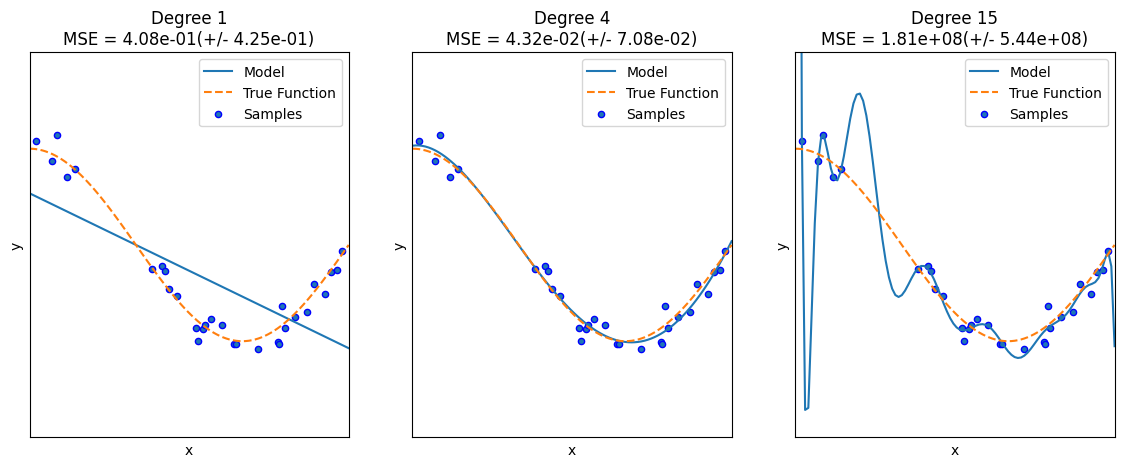

In [36]:
plt.figure(figsize=(14,5))
degress = [1,4,15]

# 다항 회귀 차수를 1,4,15로 변화시키며 비교
for i in range(len(degress)):
  ax = plt.subplot(1, len(degress), i+1)
  plt.setp(ax, xticks=(), yticks=())

  # 개별 degree 별로 Polynomial 변환
  polynomial_features = PolynomialFeatures(degree=degress[i], include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([('polynomial_features', polynomial_features),
                       ('linear_regression', linear_regression)])
  pipeline.fit(X.reshape(-1,1), y)

  # 교차 검증으로 다항 회귀 평가
  scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv=10)
  # pipeline 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 coef 추출
  coefficients = pipeline.named_steps['linear_regression'].coef_
  print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degress[i], np.round(coefficients,2)))
  print('Degree {0} MSE는 {1} 입니다.'.format(degress[i], -1*np.mean(scores)))

  # 0부터 1까지 테스트 데이터 세트 100개로 분리
  # 테스트 데이터 세트에 회귀 예측 수행, 곡선그려 비교
  X_test = np.linspace(0,1,100)
  # 예측값 곡선
  plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label='Model')
  # 실제값 곡선
  plt.plot(X_test, true_fun(X_test), '--',label='True Function')
  plt.scatter(X,y,edgecolor='b',s=20,label='Samples')

  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim((0,1))
  plt.ylim((-2,2))
  plt.legend(loc='best')

  plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degress[i], -scores.mean(), scores.std()))

plt.show()

1번: 과소적합 모델. 코사인 데이터를 단순 직선으로 예측하기에 부족

2번: 학습데이터셋 잘 반영. 가장 뛰어난 예측 성능

3번: 과적합 모델. 학습데이터세트만 정확히 예측. 실제 곡선과는 완전히 다른 형태